In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from numpy.polynomial import Polynomial

# Set the float format to prevent scientific notation
pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_columns', None)

ma = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data_updatedsums_NEW_Alldata.csv',low_memory=False) #ma_ntl_data ma_ntl_data_updatedsums_NoVIIRS ma_ntl_data_updatedsums_NEW ma_ntl_data_updatedsums_NEW_Alldata


meg = ma.copy()
meg = meg.drop([
    'Subdistrict', 'SubDistrict code', 'District','District code','Block code', 'Block', 'State',
       'State code','Village',
       'other_assembly_constituencies'
       ], axis=1)

meg = meg.rename(columns={'state_name': 'State', 'district_name': 'District','gp_name':'GP',
                                    'sub_district_name':'Subdistrict','village_name':'Village','block_name':'Block',
                                    'state_code':'State_code','district_code':'District_code','sub_district_code':'Subdistrict_code',
                                    'block_code':'Block_code','gp_code':'GP_code','Village code':'Village_code'
                                    })

meg = meg.dropna(subset=['avg_ntl'])
meg = meg.dropna(subset=['total_population'])
# meg = meg[meg['total_population'] != 'Nava Mota']
meg["ntl_pc"]= meg['avg_ntl']/meg['total_population']

# Reset the index if needed
meg.reset_index(drop=True, inplace=True)
meg['total_population'] = meg['total_population'].astype(float)


In [28]:
towns = meg[meg['total_population'] >= 5000]
vills = meg[meg['total_population'] < 5000]

In [29]:
# Calculate the mean of each column and store it in a new Series
averages = meg[[
    'total_population',
    'avg_ntl',
    # 'availability_of_farm_gate_processing', 
    # 'availability_of_food_storage_warehouse', 
    # 'availability_of_goatary_dev_project', 
    # 'availability_of_milk_routes', 
    # 'availability_of_pigery_development', 
    # 'availability_of_poultry_dev_project', 
    # 'is_common_pastures_available', 
    # 'is_fertilizer_shop_available', 
    # 'is_govt_seed_centre_available', 
    # 'availability_of_major_source_of_irrigation', 
    # 'availability_of_livestock_extension_services', 
    # 'is_soil_testing_centre_available',
    'availability_of_govt_degree_college',
    'availability_of_high_school',
    'availability_of_middle_school',
    'availability_of_primary_school',
    'availability_of_ssc_school',
    'availability_of_phc_chc',
    'availability_of_jan_aushadhi_kendra',
    'availability_of_mother_child_health_facilities',
    'is_aanganwadi_centre_available',
    'is_veterinary_hospital_available',
    'availability_of_market',
    'availability_of_panchayat_bhawan',
    'availability_of_public_transport',
    'availability_of_railway_station',
    'is_bank_available',
    'is_post_office_available',
    'is_village_connected_to_all_weather_road'
               ]]

# Print the averages
summary_stats = averages.describe()
summary_stats

,total_population,avg_ntl,availability_of_govt_degree_college,availability_of_high_school,availability_of_middle_school,availability_of_primary_school,availability_of_ssc_school,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,availability_of_mother_child_health_facilities,is_aanganwadi_centre_available,is_veterinary_hospital_available,availability_of_market,availability_of_panchayat_bhawan,availability_of_public_transport,availability_of_railway_station,is_bank_available,is_post_office_available,is_village_connected_to_all_weather_road
count,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000,517894.00000
mean,1851.11287,38.08397,0.03186,0.20045,0.42758,0.81719,0.12175,0.12734,0.06615,0.33562,0.82861,0.11671,0.10535,0.45257,0.37833,0.02987,0.12716,0.24316,0.71877
std,3020.61676,108.03391,0.17563,0.40034,0.49473,0.38651,0.32700,0.33336,0.24855,0.47221,0.37685,0.32107,0.30700,0.49775,0.48497,0.17024,0.33315,0.42899,0.44960
min,1.00000,0.28600,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,508.00000,12.02700,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,1078.00000,21.49700,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
75%,2131.00000,40.21975,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000
max,99989.00000,22220.42200,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


# Subdist Level -  Towns vs Villages

## Towns

In [30]:
mer_sub = towns.groupby(['State','District','District_code','Subdistrict']).agg({'avg_ntl': 'sum', 'total_population': 'sum',
                                                                               'agro':'sum','med':'sum','edu':'sum','transportadmin':'sum','road':'sum','SubDistrict Area':'mean'}).reset_index()
mer_sub['avg_ntl'] = mer_sub['avg_ntl'].astype(float)
mer_sub = mer_sub.rename(columns={'avg_ntl': 'subdist_ntl', 'total_population': 'subdist_population',
                                  'agro':'subdist_agro_sum','med':'subdist_med_sum','edu':'subdist_edu_sum',
                                  'transportadmin':'subdist_transportadmin_sum','SubDistrict Area':'area',
                                  'road':'villages_road'})
mer_sub['subdist_ntl_pc'] = mer_sub['subdist_ntl']/mer_sub['subdist_population']
mer_all_sub = pd.merge(towns, mer_sub, on=['Subdistrict','District','District_code','State'], how='outer')
mer_all_sub['subdist_pop_share'] = mer_all_sub['total_population']/mer_all_sub['subdist_population']
mer_all_sub

,State_code,State,District_code,District,Subdistrict_code,Subdistrict,Block_code,Block,GP_code,GP,Village_code,Village,village_pin_code,pc_code,ac_code,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,SubDistrict Area,subdist_ntl_pa,avg_ntl,ntl_pa,agro,edu,med,electric,road,transportadmin,ntl_pc,subdist_ntl,subdist_population,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,area,subdist_ntl_pc,subdist_pop_share
0,19,WEST BENGAL,319,MURSHIDABAD,2246,Bharatpur - II,3007,BHARATPUR-II,110579,SALAR,315742,Salar (CT),742401.00000,220.00000,1870.00000,99989.00000,52337.00000,47652.00000,19305.00000,11963.00000,7342.00000,1,0,1,0,250.00000,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,885.00000,1,1,0,0,1,1,1,1864.00000,35.00000,1,1,1,123.00000,1,1,1,1,0,1,1,2960.00000,1902.00000,1058.00000,1902.00000,13.00000,22.00000,48.00000,46.00000,5693.00000,2586.00000,14213.00000,1,1,2865.00000,2806.00000,Bharatpur - II,1.88623,8.72200,189.15200,4.87100,75.20000,8.62100,7,5,4,0,2,4,0.00075,407.33600,199575.00000,34,29,34,26,18,189.15200,0.00204,0.50101
1,19,WEST BENGAL,319,MURSHIDABAD,2246,Bharatpur - II,3007,BHARATPUR-II,110577,KAGRAM,315714,Kagram,742401.00000,220.00000,1870.00000,17000.00000,8550.00000,8450.00000,3920.00000,2025.00000,1895.00000,0,0,0,0,813.00000,0,1,1,0,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,2000.00000,1,1,0,0,1,1,1,1070.00000,32.00000,1,1,1,500.00000,0,0,1,1,0,1,1,115.00000,115.00000,105.00000,105.00000,0.00000,55.00000,105.00000,105.00000,55.00000,70.00000,2050.00000,1,0,115.00000,115.00000,Bharatpur - II,3.82485,13.17400,189.15200,4.87100,58.91000,4.47200,5,4,3,0,2,4,0.00347,407.33600,199575.00000,34,29,34,26,18,189.15200,0.00204,0.085

In [31]:
columns_to_keep = ['Subdistrict', 'District', 'District_code', 'State', 'subdist_agro_sum', 'subdist_med_sum',
       'subdist_edu_sum', 'subdist_transportadmin_sum','villages_road','area']

# Create a new DataFrame with only the selected columns
filter_sub = mer_sub[columns_to_keep]
# filter_sub 

In [32]:
sub_sorted = mer_all_sub.sort_values(by=['State','District', 'Subdistrict','ntl_pc'])
sub_sorted['Index'] = sub_sorted.groupby(['State','District','Subdistrict']).cumcount() + 1
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
sub_sorted['Max_Len'] = sub_sorted.groupby(['State','District','Subdistrict'])['Index'].transform('max')

In [33]:
def calculate_alesina(group):
    sum_y = group['ntl_pc'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pc'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# ale = mer_sorted.groupby(['District']).apply(calculate_alesina).reset_index()

ale2 = sub_sorted.groupby(['State','District','District_code',
                          'Subdistrict',
                          'subdist_ntl','subdist_population',
                          'subdist_ntl_pc']).apply(calculate_alesina).reset_index()
# Rename the columns for clarity
ale2.columns = ['State','District','District_code',
               'Subdistrict',
               'subdist_ntl','subdist_population',
               'subdist_ntl_pc',
               'sum_y','numerator', 'num','alesina']

# ale2['alesina'] = ale2['alesina'].abs()
# ale = ale[ale['dist_ntl_pc'] <= 0.04]
# ale = ale[ale['alesina'] > 0]

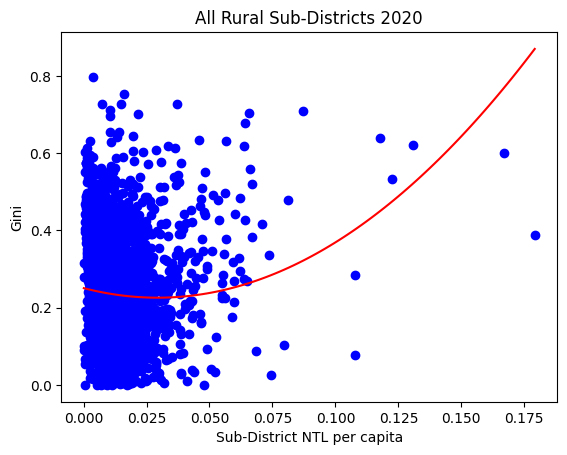

In [34]:
ale = ale2.copy()
ale = ale[ale['alesina'] > 0]
ale = ale[ale['subdist_ntl_pc'] <= 0.2]

# ale = ale[ale['num']>10]

# Create a scatterplot
plt.scatter(ale['subdist_ntl_pc'], ale['alesina'], label='Alesina Gini', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Gini")
plt.title("All Rural Sub-Districts 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(ale['subdist_ntl_pc'], ale['alesina'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(ale['subdist_ntl_pc']), max(ale['subdist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')
# plt.xlim(0,0.105)
# plt.ylim(-0.05,1.05)

# Add a legend
# plt.legend()
# Display the plot
plt.show()

In [35]:
panel_old = pd.merge(ale2, filter_sub, on=['State','District','District_code','Subdistrict'], how='right')
# panel = panel[panel['dist_ntl_pc'] <= 0.04]
# panel = panel[panel['alesina'] > 0]


In [36]:
df20 = sub_sorted.copy()
df20['str'] = df20['total_primary_school_students']/df20['total_primary_school_teachers']

In [37]:
#Assuming df is your DataFrame
# Selecting the relevant columns
selected_columns = [
    'availability_of_primary_school',
    'is_primary_school_with_electricity',
    'primary_school_toilet',
    'is_primary_school_with_computer_lab',
    'is_primary_school_with_playground',
    'is_primary_school_have_drinking_water',
    'availability_of_mid_day_meal_scheme'
]

# Filtering rows based on the condition
filtered_rows_old = df20[df20['availability_of_primary_school'] < df20[selected_columns[1:]].max(axis=1)]

# Align the DataFrame and recode values to 0 where they are greater than availability_of_primary_school
df20[selected_columns[1:]] = df20[selected_columns[1:]].where(
    df20[selected_columns[1:]].le(df20['availability_of_primary_school'], axis=0), 0
)

In [38]:
mer_cat_old = df20.groupby(['Subdistrict','District','District_code','State']).agg({ 'total_population': 'sum',
                                                                               'agro':'sum','med':'sum','edu':'sum','transportadmin':'sum','area_sq_km':'sum',
                                                                               'total_hhd':'sum','total_hhd_engaged_in_farm_activities':'sum','is_village_connected_to_all_weather_road':'sum',
                                                                               'availability_of_railway_station':'sum','availability_of_public_transport':'sum',
                                                                               'availability_of_primary_school':'sum', 
                                                                               'is_primary_school_with_electricity':'sum','primary_school_toilet':'sum',
                                                                               'is_primary_school_with_computer_lab':'sum','is_primary_school_with_playground':'sum',
                                                                               'is_primary_school_have_drinking_water':'sum','availability_of_mid_day_meal_scheme':'sum',
                                                                               'total_primary_school_students':'sum','total_primary_school_teachers':'sum',
                                                                               'availability_of_middle_school':'sum','availability_of_high_school':'sum',
                                                                               'availability_of_ssc_school':'sum','availability_of_govt_degree_college':'sum',
                                                                               'availability_of_phc_chc':'sum','availability_of_jan_aushadhi_kendra':'sum',
                                                                               'is_aanganwadi_centre_available':'sum','is_veterinary_hospital_available':'sum',
                                                                               'availability_of_internal_pucca_road':'sum','is_village_connected_to_all_weather_road':'sum',
                                                                               'total_no_of_registered_children_in_anganwadi':'sum',
                                                                               'total_male_child_age_bw_0_6':'sum',	'total_female_child_age_bw_0_6':'sum',
                                                                               'availability_of_mother_child_health_facilities':'sum',
                                                                               
                                                                               'nearest_urban_proximity':'mean','str':'mean',
                                                                               }).reset_index()


In [39]:
panel_cat_old = pd.merge(panel_old, mer_cat_old, on=['Subdistrict','District','District_code','State'], how='right')

panel_cat_old['no_1000s'] = panel_cat_old['subdist_population']/1000

panel_cat_old['edu_per_1000']= panel_cat_old['subdist_edu_sum']/panel_cat_old['no_1000s']
panel_cat_old['adm_per_1000']= panel_cat_old['subdist_transportadmin_sum']/panel_cat_old['no_1000s']
panel_cat_old['arg_per_1000']= panel_cat_old['subdist_agro_sum']/panel_cat_old['no_1000s']
panel_cat_old['no_1000_students'] = panel_cat_old['total_primary_school_students']/1000
panel_cat_old['primaryschool_per_100']= panel_cat_old['availability_of_primary_school']/panel_cat_old['no_1000_students']


panel_cat_old['children_bw_0_6']= panel_cat_old['total_male_child_age_bw_0_6'] + panel_cat_old['total_female_child_age_bw_0_6']
panel_cat_old['med_per_1000']= panel_cat_old['subdist_med_sum']/panel_cat_old['no_1000s']
panel_cat_old['phc_per_1000']= panel_cat_old['availability_of_phc_chc']/panel_cat_old['no_1000s']
panel_cat_old['mchc_per_1000']= panel_cat_old['availability_of_mother_child_health_facilities']/panel_cat_old['no_1000s']
panel_cat_old['veter_per_1000'] = panel_cat_old['is_veterinary_hospital_available']/panel_cat_old['no_1000s']
panel_cat_old['no_100_kids'] = panel_cat_old['children_bw_0_6']/100
panel_cat_old['no_100_kids_reg'] = panel_cat_old['total_no_of_registered_children_in_anganwadi']/100
panel_cat_old['aanganwadi_per_100']= panel_cat_old['is_aanganwadi_centre_available']/panel_cat_old['no_100_kids']
panel_cat_old['aanganwadi_per_100_reg']= panel_cat_old['is_aanganwadi_centre_available']/panel_cat_old['no_100_kids_reg']

panel_cat_old['share_roads'] = panel_cat_old['is_village_connected_to_all_weather_road']/panel_cat_old['num']
panel_cat_old['share_rails'] = panel_cat_old['availability_of_railway_station']/panel_cat_old['num']
panel_cat_old['share_pubtn'] = panel_cat_old['availability_of_public_transport']/panel_cat_old['num']
panel_cat_old['ps_share_elec'] = panel_cat_old['is_primary_school_with_electricity']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_toil'] = panel_cat_old['primary_school_toilet']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_clab'] = panel_cat_old['is_primary_school_with_computer_lab']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_play'] = panel_cat_old['is_primary_school_with_playground']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_dwat'] = panel_cat_old['is_primary_school_have_drinking_water']/panel_cat_old['availability_of_primary_school']
panel_cat_old['ps_share_meal'] = panel_cat_old['availability_of_mid_day_meal_scheme']/panel_cat_old['availability_of_primary_school']
						


In [40]:
panel_cat_old.to_csv('/Users/sid/Desktop/2020catdata_towns.csv',index=False)

## Villages

In [41]:
mer_sub_v = vills.groupby(['State','District','District_code','Subdistrict']).agg({'avg_ntl': 'sum', 'total_population': 'sum',
                                                                               'agro':'sum','med':'sum','edu':'sum','transportadmin':'sum','road':'sum','SubDistrict Area':'mean'}).reset_index()
mer_sub_v['avg_ntl'] = mer_sub_v['avg_ntl'].astype(float)
mer_sub_v = mer_sub_v.rename(columns={'avg_ntl': 'subdist_ntl', 'total_population': 'subdist_population',
                                  'agro':'subdist_agro_sum','med':'subdist_med_sum','edu':'subdist_edu_sum',
                                  'transportadmin':'subdist_transportadmin_sum','SubDistrict Area':'area',
                                  'road':'villages_road'})
mer_sub_v['subdist_ntl_pc'] = mer_sub_v['subdist_ntl']/mer_sub_v['subdist_population']
mer_all_sub_v = pd.merge(vills, mer_sub_v, on=['Subdistrict','District','District_code','State'], how='outer')
mer_all_sub_v['subdist_pop_share'] = mer_all_sub_v['total_population']/mer_all_sub_v['subdist_population']
mer_all_sub_v

,State_code,State,District_code,District,Subdistrict_code,Subdistrict,Block_code,Block,GP_code,GP,Village_code,Village,village_pin_code,pc_code,ac_code,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,is_govt_seed_centre_available,availability_of_fpos_pacs,availability_of_food_storage_warehouse,availability_of_farm_gate_processing,total_cultivable_area_in_hac,is_soil_testing_centre_available,is_fertilizer_shop_available,availability_of_major_source_of_irrigation,availability_of_livestock_extension_services,availability_of_milk_routes,availability_of_poultry_dev_project,availability_of_goatary_dev_project,availability_of_pigery_development,is_veterinary_hospital_available,is_village_connected_to_all_weather_road,availability_of_internal_pucca_road,availability_of_public_transport,availability_of_railway_station,availablility_hours_of_domestic_electricity,availability_of_solor_wind_energy,availability_of_panchayat_bhawan,availability_of_csc_in_village,is_common_pastures_available,availability_of_public_library,is_bank_available,is_atm_available,is_post_office_available,total_hhd_having_bpl_cards,availability_of_primary_school,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,availability_of_middle_school,availability_of_high_school,availability_of_ssc_school,no_of_children_not_attending_school,availability_of_govt_degree_college,is_vocational_edu_centre_available,availability_of_market,availability_of_phc_chc,availability_of_jan_aushadhi_kendra,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,availability_of_mother_child_health_facilities,availability_of_adult_edu_centre,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,SubDistrict Area,subdist_ntl_pa,avg_ntl,ntl_pa,agro,edu,med,electric,road,transportadmin,ntl_pc,subdist_ntl,subdist_population,subdist_agro_sum,subdist_med_sum,subdist_edu_sum,subdist_transportadmin_sum,villages_road,area,subdist_ntl_pc,subdist_pop_share
0,21,ODISHA,365,MAYURBHANJ,2880,Baisinga,3491,BETNOTI,120109,AMBAGADIA,390330,Ambagadia,757028.00000,274.00000,2229.00000,4999.00000,2553.00000,2446.00000,971.00000,445.00000,231.00000,0,0,0,0,861.00000,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,544.00000,1,1,0,0,1,1,1,212.00000,7.00000,1,1,0,2.00000,0,0,0,0,0,1,1,198.00000,192.00000,166.00000,190.00000,0.00000,8.00000,8.00000,0.00000,98.00000,166.00000,2.00000,0,0,192.00000,190.00000,Motu,NaN,13.53000,314.07000,6.63300,57.45400,4.24600,1,3,1,1,2,1,0.01149,1949.67300,132840.00000,223,324,248,103,258,314.07000,0.01468,0.03763
1,21,ODISHA,365,MAYURBHANJ,2880,Baisinga,3491,BETNOTI,120124,PURUNIA,390332,Purunia,757028.00000,274.00000,2229.00000,4585.00000,2301.00000,2284.00000,1036.00000,860.00000,176.00000,1,0,1,1,383.00000,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,200.00000,1,1,0,0,1,1,1,110.00000,5.00000,0,1,0,0.00000,0,0,0,1,0,1,1,105.00000,105.00000,111.00000,105.00000,0.00000,0.00000,0.00000,3.00000,111.00000,105.00000,506.00000,1,0,200.00000,142.00000,Motu,NaN,5.19200,314.07000,6.63300,31.49000,6.06500,7,2,3,1,1,3,0.00687,1949.67300,132840.00000,223,324,248,103,258,314.07000,0.01468,0.03452
2,21,ODISHA,365,MAYURBHANJ,2880,Baisinga,3491,BETNOTI,120115,GADADEULIA,390425,Gada

In [42]:
columns_to_keep = ['Subdistrict', 'District', 'District_code', 'State', 'subdist_agro_sum', 'subdist_med_sum',
       'subdist_edu_sum', 'subdist_transportadmin_sum','villages_road','area']

# Create a new DataFrame with only the selected columns
filter_sub_v = mer_sub_v[columns_to_keep]
# filter_sub 

In [43]:
sub_sorted_v = mer_all_sub_v.sort_values(by=['State','District', 'Subdistrict','ntl_pc'])
sub_sorted_v['Index'] = sub_sorted_v.groupby(['State','District','Subdistrict']).cumcount() + 1
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
sub_sorted_v['Max_Len'] = sub_sorted_v.groupby(['State','District','Subdistrict'])['Index'].transform('max')

In [44]:
def calculate_alesina(group):
    sum_y = group['ntl_pc'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pc'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# ale = mer_sorted.groupby(['District']).apply(calculate_alesina).reset_index()

ale3 = sub_sorted_v.groupby(['State','District','District_code',
                          'Subdistrict',
                          'subdist_ntl','subdist_population',
                          'subdist_ntl_pc']).apply(calculate_alesina).reset_index()
# Rename the columns for clarity
ale3.columns = ['State','District','District_code',
               'Subdistrict',
               'subdist_ntl','subdist_population',
               'subdist_ntl_pc',
               'sum_y','numerator', 'num','alesina']

# ale2['alesina'] = ale2['alesina'].abs()
# ale = ale[ale['dist_ntl_pc'] <= 0.04]
# ale = ale[ale['alesina'] > 0]

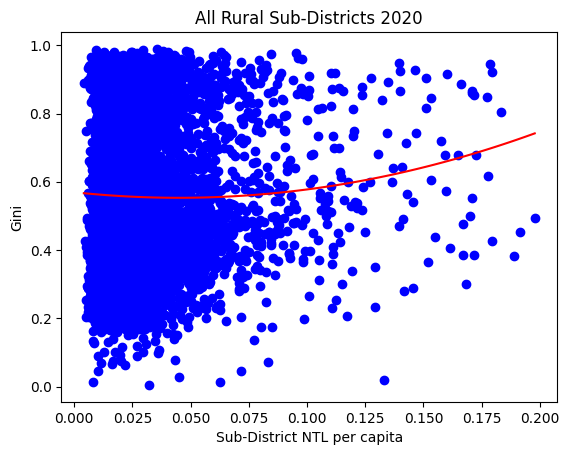

In [45]:
ale = ale3.copy()
ale = ale[ale['alesina'] > 0]
ale = ale[ale['subdist_ntl_pc'] <= 0.2]

# ale = ale[ale['num']>10]

# Create a scatterplot
plt.scatter(ale['subdist_ntl_pc'], ale['alesina'], label='Alesina Gini', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Gini")
plt.title("All Rural Sub-Districts 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(ale['subdist_ntl_pc'], ale['alesina'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(ale['subdist_ntl_pc']), max(ale['subdist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')
# plt.xlim(0,0.105)
# plt.ylim(-0.05,1.05)

# Add a legend
# plt.legend()
# Display the plot
plt.show()

In [46]:
panel_old_v = pd.merge(ale3, filter_sub_v, on=['State','District','District_code','Subdistrict'], how='right')
# panel = panel[panel['dist_ntl_pc'] <= 0.04]
# panel = panel[panel['alesina'] > 0]


In [47]:
df21 = sub_sorted_v.copy()
df21['str'] = df21['total_primary_school_students']/df21['total_primary_school_teachers']

#Assuming df is your DataFrame
# Selecting the relevant columns
selected_columns = [
    'availability_of_primary_school',
    'is_primary_school_with_electricity',
    'primary_school_toilet',
    'is_primary_school_with_computer_lab',
    'is_primary_school_with_playground',
    'is_primary_school_have_drinking_water',
    'availability_of_mid_day_meal_scheme'
]

# Filtering rows based on the condition
filtered_rows_old = df21[df21['availability_of_primary_school'] < df21[selected_columns[1:]].max(axis=1)]

# Align the DataFrame and recode values to 0 where they are greater than availability_of_primary_school
df21[selected_columns[1:]] = df21[selected_columns[1:]].where(
    df21[selected_columns[1:]].le(df21['availability_of_primary_school'], axis=0), 0
)

In [48]:
mer_cat_old_v = df21.groupby(['Subdistrict','District','District_code','State']).agg({ 'total_population': 'sum',
                                                                               'agro':'sum','med':'sum','edu':'sum','transportadmin':'sum','area_sq_km':'sum',
                                                                               'total_hhd':'sum','total_hhd_engaged_in_farm_activities':'sum','is_village_connected_to_all_weather_road':'sum',
                                                                               'availability_of_railway_station':'sum','availability_of_public_transport':'sum',
                                                                               'availability_of_primary_school':'sum', 
                                                                               'is_primary_school_with_electricity':'sum','primary_school_toilet':'sum',
                                                                               'is_primary_school_with_computer_lab':'sum','is_primary_school_with_playground':'sum',
                                                                               'is_primary_school_have_drinking_water':'sum','availability_of_mid_day_meal_scheme':'sum',
                                                                               'total_primary_school_students':'sum','total_primary_school_teachers':'sum',
                                                                               'availability_of_middle_school':'sum','availability_of_high_school':'sum',
                                                                               'availability_of_ssc_school':'sum','availability_of_govt_degree_college':'sum',
                                                                               'availability_of_phc_chc':'sum','availability_of_jan_aushadhi_kendra':'sum',
                                                                               'is_aanganwadi_centre_available':'sum','is_veterinary_hospital_available':'sum',
                                                                               'availability_of_internal_pucca_road':'sum','is_village_connected_to_all_weather_road':'sum',
                                                                               'total_no_of_registered_children_in_anganwadi':'sum',
                                                                               'total_male_child_age_bw_0_6':'sum',	'total_female_child_age_bw_0_6':'sum',
                                                                               'availability_of_mother_child_health_facilities':'sum',
                                                                               
                                                                               'nearest_urban_proximity':'mean','str':'mean',
                                                                               }).reset_index()


In [49]:
panel_cat_old_v = pd.merge(panel_old_v, mer_cat_old_v, on=['Subdistrict','District','District_code','State'], how='right')

panel_cat_old_v['no_1000s'] = panel_cat_old_v['subdist_population']/1000

panel_cat_old_v['edu_per_1000']= panel_cat_old_v['subdist_edu_sum']/panel_cat_old_v['no_1000s']
panel_cat_old_v['adm_per_1000']= panel_cat_old_v['subdist_transportadmin_sum']/panel_cat_old_v['no_1000s']
panel_cat_old_v['arg_per_1000']= panel_cat_old_v['subdist_agro_sum']/panel_cat_old_v['no_1000s']
panel_cat_old_v['no_1000_students'] = panel_cat_old_v['total_primary_school_students']/1000
panel_cat_old_v['primaryschool_per_100']= panel_cat_old_v['availability_of_primary_school']/panel_cat_old_v['no_1000_students']


panel_cat_old_v['children_bw_0_6']= panel_cat_old_v['total_male_child_age_bw_0_6'] + panel_cat_old_v['total_female_child_age_bw_0_6']
panel_cat_old_v['med_per_1000']= panel_cat_old_v['subdist_med_sum']/panel_cat_old_v['no_1000s']
panel_cat_old_v['phc_per_1000']= panel_cat_old_v['availability_of_phc_chc']/panel_cat_old_v['no_1000s']
panel_cat_old_v['mchc_per_1000']= panel_cat_old_v['availability_of_mother_child_health_facilities']/panel_cat_old_v['no_1000s']
panel_cat_old_v['veter_per_1000'] = panel_cat_old_v['is_veterinary_hospital_available']/panel_cat_old_v['no_1000s']
panel_cat_old_v['no_100_kids'] = panel_cat_old_v['children_bw_0_6']/100
panel_cat_old_v['no_100_kids_reg'] = panel_cat_old_v['total_no_of_registered_children_in_anganwadi']/100
panel_cat_old_v['aanganwadi_per_100']= panel_cat_old_v['is_aanganwadi_centre_available']/panel_cat_old_v['no_100_kids']
panel_cat_old_v['aanganwadi_per_100_reg']= panel_cat_old_v['is_aanganwadi_centre_available']/panel_cat_old_v['no_100_kids_reg']

panel_cat_old_v['share_roads'] = panel_cat_old_v['is_village_connected_to_all_weather_road']/panel_cat_old_v['num']
panel_cat_old_v['share_rails'] = panel_cat_old_v['availability_of_railway_station']/panel_cat_old_v['num']
panel_cat_old_v['share_pubtn'] = panel_cat_old_v['availability_of_public_transport']/panel_cat_old_v['num']
panel_cat_old_v['ps_share_elec'] = panel_cat_old_v['is_primary_school_with_electricity']/panel_cat_old_v['availability_of_primary_school']
panel_cat_old_v['ps_share_toil'] = panel_cat_old_v['primary_school_toilet']/panel_cat_old_v['availability_of_primary_school']
panel_cat_old_v['ps_share_clab'] = panel_cat_old_v['is_primary_school_with_computer_lab']/panel_cat_old_v['availability_of_primary_school']
panel_cat_old_v['ps_share_play'] = panel_cat_old_v['is_primary_school_with_playground']/panel_cat_old_v['availability_of_primary_school']
panel_cat_old_v['ps_share_dwat'] = panel_cat_old_v['is_primary_school_have_drinking_water']/panel_cat_old_v['availability_of_primary_school']
panel_cat_old_v['ps_share_meal'] = panel_cat_old_v['availability_of_mid_day_meal_scheme']/panel_cat_old_v['availability_of_primary_school']
						


In [50]:
panel_cat_old_v.to_csv('/Users/sid/Desktop/2020catdata_villages.csv',index=False)